In [51]:
import pandas as pd
import numpy as np 

import tensorflow as tf 


In [52]:
import os 
bench, squat, deadlift = [], [], []
root = 'csv_files'
for subdir, dirs, files in os.walk(root):
    for f in files: 
        if 'bench' in f:
            bench.append(pd.read_csv(f'{root}/{f}'))
        elif 'squat' in f:
            squat.append(pd.read_csv(f'{root}/{f}'))
        else:
            deadlift.append(pd.read_csv(f'{root}/{f}'))

In [53]:
import random 
import matplotlib.pyplot as plt 

bench[0].axes

[RangeIndex(start=0, stop=461, step=1),
 Index(['Time', 'Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z',
        'dt'],
       dtype='object')]

In [54]:
axes = list(bench[0].columns)
axes = axes[1:-1]
axes

['Accel_X', 'Accel_Y', 'Accel_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z']

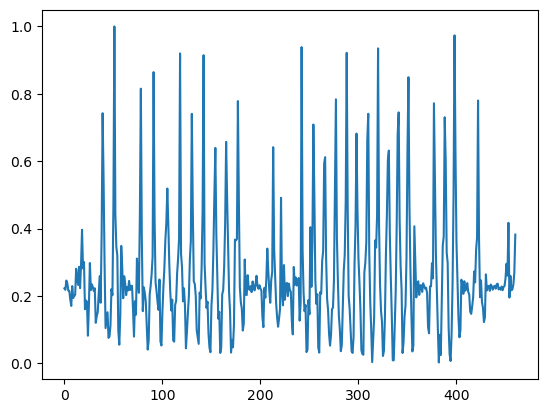

In [55]:
a = random.choice(bench)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

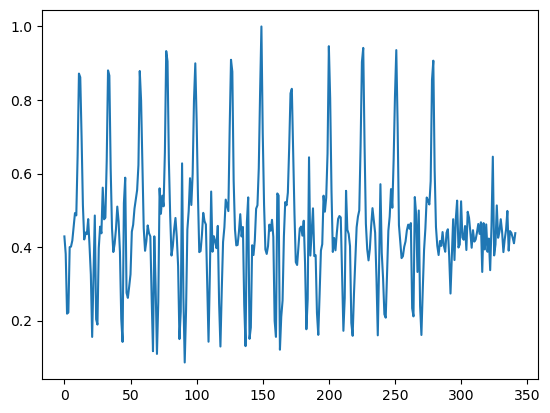

In [56]:
a = random.choice(squat)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

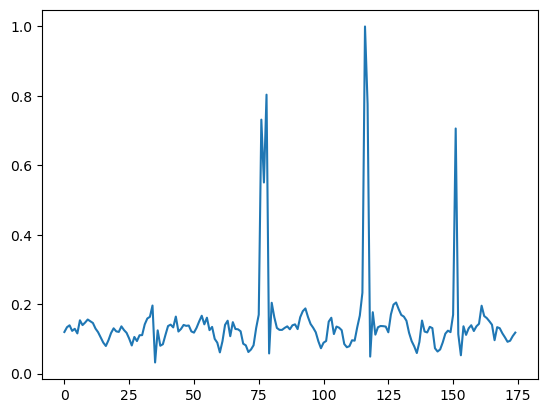

In [57]:
a = random.choice(deadlift)
sig = np.sum([a[e].to_numpy()**2 for e in ['Accel_X', 'Accel_Y', 'Accel_Z']], axis=0)
sig /= np.max(sig)
plt.plot(sig)

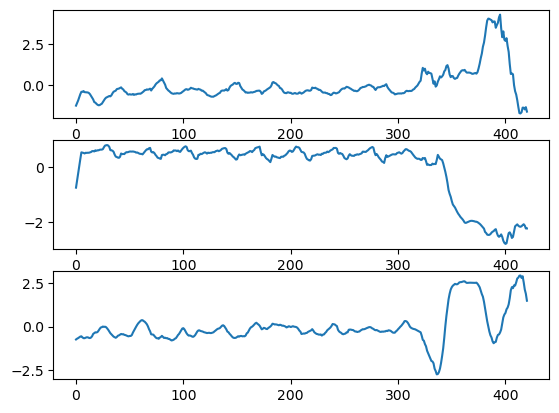

In [58]:
# for rep counting:
a = random.choice(bench)
k = 10
def normalize_1(sig):
    if isinstance(sig, pd.Series):
        sig = sig.to_numpy()
    sig = np.convolve(sig, np.ones((k, ))/k, 'same')
    return (sig - np.mean(sig))/np.std(sig)



def normalize_2(sig):
    if isinstance(sig, pd.Series):
        sig = sig.to_numpy()
    sig = np.convolve(sig, np.ones((k,))/k, 'same')
    return (sig - np.mean(sig))/np.max(np.abs(sig))

def normalize_3(sig, fs=10):
        
    sig = (sig - np.mean(sig))
    freqs = np.fft.fftfreq(len(sig), d=1/fs)
    fft_vals = np.fft.fft(sig)

    cutoff = 0.5
    fft_filtered = fft_vals.copy()
    fft_filtered[np.abs(freqs) > cutoff] = 0
    fft_filtered /= k
    out = np.fft.ifft(fft_filtered).real
    return out/np.max(np.abs(out))


plt.figure()
plt.subplot(311)
plt.plot(normalize_1(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_1(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_1(a['Accel_Z']))




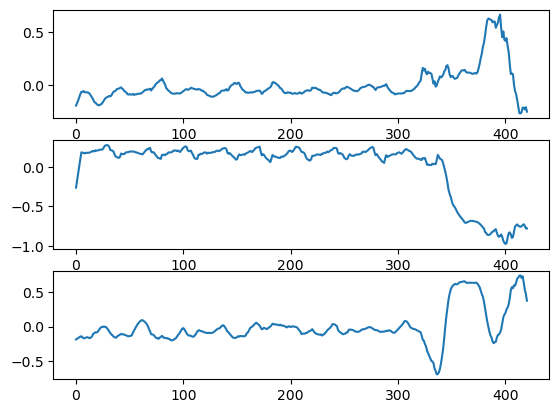

In [59]:
plt.subplot(311)
plt.plot(normalize_2(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_2(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_2(a['Accel_Z']))

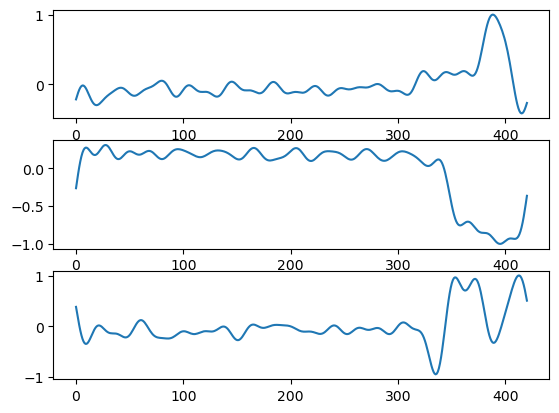

In [60]:

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))

# Rep counting

Normalization: Padding, Convolution, subtract mean, divide by either max or std, find most symmetric signal, count its x intercepts. 

subtract mean, fft, cutoff high freq, divide by constant, ifft, divide by max

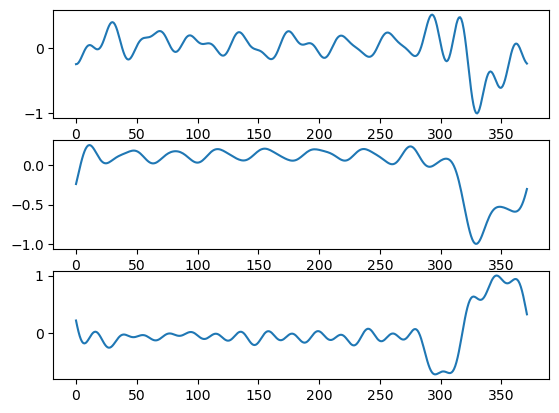

In [61]:
a = random.choice(bench)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


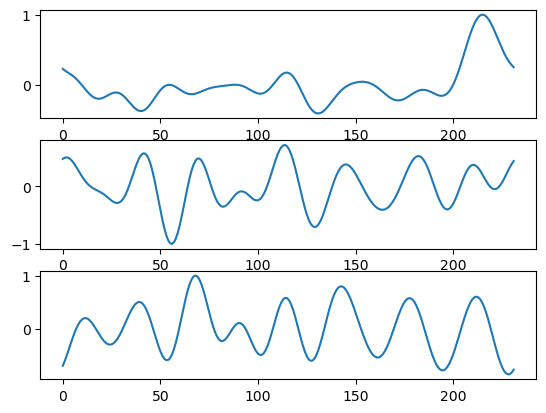

In [62]:
a = random.choice(squat)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


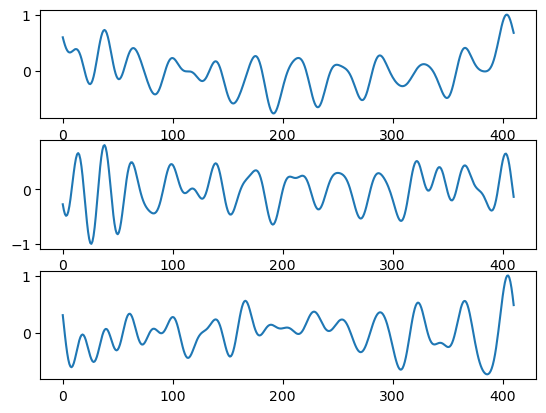

In [63]:
a = random.choice(deadlift)

plt.subplot(311)
plt.plot(normalize_3(a['Accel_X']))

plt.subplot(312)
plt.plot(normalize_3(a['Accel_Y']))

plt.subplot(313)
plt.plot(normalize_3(a['Accel_Z']))


np.float64(14.0)

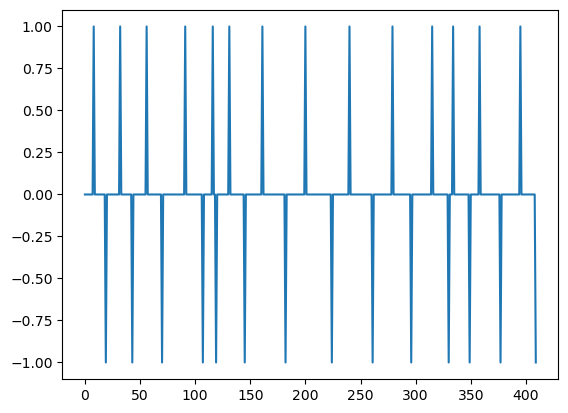

In [64]:
sig = normalize_3(a['Accel_Y'])
sig[sig > 0] = 1
sig[sig < 0] = 0
sig = np.diff(sig)
plt.plot(sig)
np.sum(np.abs(sig))/2

np.float64(14.0)

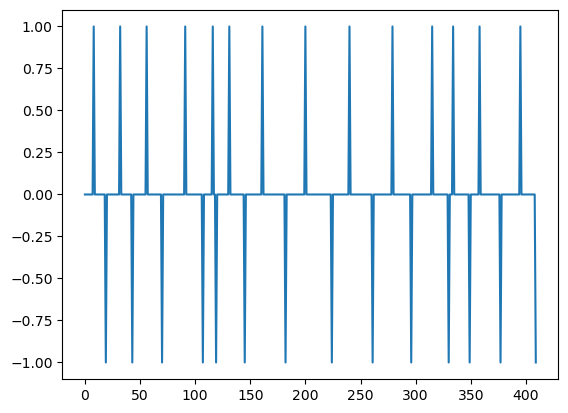

In [65]:
sig = normalize_3(a['Accel_Y'])
sig[sig > 0] = 1
sig[sig < 0] = 0
sig = np.diff(sig)
plt.plot(sig)
np.sum(np.abs(sig))/2

18.0


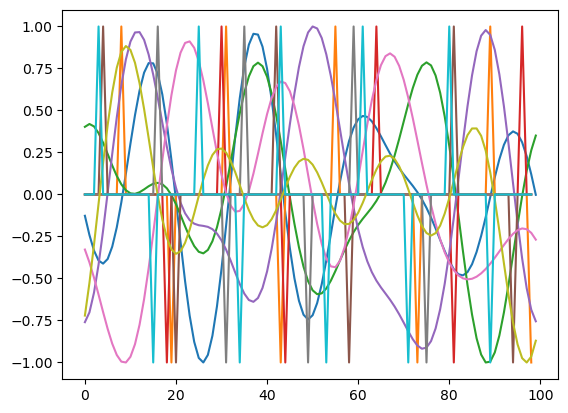

In [66]:
sig = a['Accel_Y'].to_numpy()
sig -= np.mean(sig)
interval = 100
sig = np.concatenate([sig, [sig[-1]]*(interval - len(sig)%interval)])
sig = sig.reshape((-1, interval))

r = 0
for e in sig:
    e = normalize_3(e)
    plt.plot(normalize_3(e))
    e[e > 0] = 1
    e[e < 0] = 0
    e = np.diff(e)
    plt.plot(e)
    r += np.sum(np.abs(e))/2

print(r)



In [67]:
sig = random.choice(bench)['Accel_Y'].to_numpy()
def batch(sig):
    sig -= np.mean(sig)
    interval = 100
    sig = np.concatenate([sig, [sig[-1]]*(interval - len(sig)%interval)])
    sig = sig.reshape((-1, interval))
    return sig

def normalize_3(sig, fs=10):
        
    sig = (sig - np.mean(sig))
    freqs = np.fft.fftfreq(len(sig), d=1/fs)
    fft_vals = np.fft.fft(sig)

    cutoff = 0.5
    fft_filtered = fft_vals.copy()
    fft_filtered[np.abs(freqs) > cutoff] = 0
    fft_filtered /= k
    out = np.fft.ifft(fft_filtered).real
    return out/np.max(np.abs(out))

def count(sig):
    e = sig
    e = normalize_3(e)
    e[e > 0] = 1
    e[e < 0] = 0
    e = np.diff(e)
    return np.sum(np.abs(e))/2
sig = batch(sig)
count(sig[0])

np.float64(3.0)

In [271]:
class Rep_Counting_Model(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.interval = 128
        self.kernel = tf.ones((10, 1, 1), dtype=tf.float32)/10
        self.bias = tf.zeros((1), dtype=tf.float32)
        
        self.conv = tf.keras.layers.Conv1D(filters=1, kernel_size=10, padding='same')
        self.conv.build((None, 128, 1))
        
        self.conv.set_weights([self.kernel, self.bias])

    def batch(self, sig):
        sig -= tf.reduce_mean(sig)
        interval = self.interval
        sig = tf.concat([sig, [sig[-1]]*(interval - len(sig)%interval)], axis=0)
        sig = tf.reshape(sig, (-1, interval))
        return tf.cast(sig, tf.float32)

    def normalize(self, sig):
        
        sig = tf.reshape(sig, (1, -1, 1))
        sig = self.conv(sig)
        sig = tf.squeeze(sig)
        return (sig - tf.reduce_mean(sig))/tf.reduce_max(tf.abs(sig))

    
    def heaviside_custom(self, x):
        return tf.cast(x > 0, tf.float32)
    
    @tf.function(input_signature=[tf.TensorSpec([128], dtype=tf.float32)])    
    def call(self, sig):
        sig = tf.reshape(sig, (1, -1, 1))
        sig = self.conv(sig)
        sig = tf.squeeze(sig)
        sig = (sig - tf.reduce_mean(sig))/tf.reduce_max(tf.abs(sig))

        sig = tf.nn.relu(sig)/(sig)
        sig = sig[1:] - sig[:-1]
        return tf.reduce_sum(tf.abs(sig))/2



rep_counting_model = Rep_Counting_Model()
sig = rep_counting_model.batch(rep_counting_model.normalize(bench[0]['Accel_X'].to_numpy(dtype=np.float32)))
sig = tf.convert_to_tensor(sig, dtype=tf.float32)
a = tf.cast(sig[1], tf.float32)
rep_counting_model(a).numpy()


np.float32(2.0)

In [272]:
concrete_func = rep_counting_model.call.get_concrete_function()

converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.allow_custom_ops = False
converter.experimental_new_converter = False

tflite_model = converter.convert()


interpreter = tf.lite.Interpreter(model_content=tflite_model, experimental_delegates=[])
interpreter.allocate_tensors()
ops = []
for op in interpreter._get_ops_details():
    ops.append(op["op_name"])

for e in sorted(ops):
    print(e)

I0000 00:00:1746147760.651444 18711725 devices.cc:76] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
I0000 00:00:1746147760.653588 18711725 single_machine.cc:374] Starting new session
I0000 00:00:1746147760.712791 18711725 devices.cc:76] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
I0000 00:00:1746147760.712878 18711725 single_machine.cc:374] Starting new session
W0000 00:00:1746147760.814765 18711725 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746147760.814781 18711725 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-01 18:02:40.929106: I tensorflow/compiler/mlir/lite/flatbuffer_export.cc:4061] Estimated count of arithmetic ops: 3200  ops, equivalently 1600  MACs


ABS
ABS
CONV_2D
DELEGATE
DELEGATE
DIV
DIV
MEAN
MUL
REDUCE_MAX
RELU
RESHAPE
RESHAPE
STRIDED_SLICE
STRIDED_SLICE
SUB
SUB
SUM


In [273]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

tensor_details = interpreter.get_tensor_details()
total_bytes = 0

for d in tensor_details:
    try:
        tensor = interpreter.tensor(d['index'])()
        total_bytes += tensor.nbytes
    except Exception:
        pass  # Some tensors can't be read (e.g., graph-only placeholders)

print("Actual allocated tensor memory (bytes):", total_bytes)


Actual allocated tensor memory (bytes): 1632


In [232]:
with open("a_rep_counting_model_final.tflite", "wb") as f:
    f.write(tflite_model)

In [233]:
!xxd -i a_rep_counting_model_final.tflite > a_rep_count_model_final.h

In [110]:
def normalize_3(sig, kernel= tf.ones((10, 1, 1))/10):
    sig = tf.reshape(sig, (1, -1, 1))
    sig = tf.nn.conv1d(sig, filters=kernel, stride=1, padding='SAME')
    sig = tf.squeeze(sig)
    return (sig - tf.reduce_mean(sig))/tf.reduce_max(tf.abs(sig))

def batch(sig, interval=128):
    sig -= tf.reduce_mean(sig)
    sig = tf.concat([sig, [sig[-1]]*(interval - len(sig)%interval)], axis=0)
    sig = tf.reshape(sig, (-1, interval))
    return tf.cast(sig, tf.float16)

a = bench[0]['Accel_Y'].to_numpy(dtype=np.float32)
a = normalize_3(a)
a = batch(a)

In [282]:
x_train, y_train, x_test, y_test = [], [], [], []
for e in bench:
    temp = []
    for label in axes[:3]:
        t = e[label].to_numpy(dtype=np.float32)
        t = t[:-1]
        t = normalize_3(t)
        t = batch(t, 32)
        temp.append(t)
    temp = (np.array(temp))
    k = temp.shape[1]
    x_train.extend(list(tf.constant(temp[:, i, :], dtype=tf.float32) for i in range(k)))
    y_train.extend(['bench']*k)

for e in squat:
    temp = []
    for label in axes[:3]:
        t = e[label].to_numpy(dtype=np.float32)
        t = t[:-1]
        t = normalize_3(t)
        t = batch(t, 32)
        temp.append(t)
    temp = (np.array(temp))
    k = temp.shape[1]
    x_train.extend(list(tf.constant(temp[:, i, :], dtype=tf.float32) for i in range(k)))
    y_train.extend(['squat']*k)


for e in deadlift:
    temp = []
    for label in axes[:3]:
        t = e[label].to_numpy(dtype=np.float32)
        t = t[:-1]
        t = normalize_3(t)
        t = batch(t,32)
        temp.append(t)
    temp = (np.array(temp))
    k = temp.shape[1]
    x_train.extend(list(tf.constant(temp[:, i, :], dtype=tf.float32) for i in range(k)))
    y_train.extend(['deadlift']*k)

from sklearn.model_selection import train_test_split

train_x, train_y, test_x, test_y = train_test_split(x_train, y_train, test_size=10/75, shuffle=True)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
x_train = tf.constant(np.stack([x.numpy() for x in x_train], axis=0), dtype=tf.float16)


def build_cnn(input_shape=(3, 32), num_classes=3):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Reshape((3, 32, 1)),

        #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        #tf.keras.layers.MaxPooling2D((6, 3)),

        tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
        #tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


model = build_cnn()
model.summary()
model.fit(x_train, y_train, epochs=5, batch_size=1,validation_split=0.2)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_12 (Reshape)            │ (None, 3, 32, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 3, 32, 16)      │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │        49,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,443 (193.14 KB)

 Trainable params: 49,443 (193.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.4084 - loss: 1.0074 - val_accuracy: 0.1731 - val_loss: 1.3069
Epoch 2/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.6995 - loss: 0.7100 - val_accuracy: 0.2692 - val_loss: 1.5493
Epoch 3/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.8842 - loss: 0.4530 - val_accuracy: 0.4808 - val_loss: 1.1169
Epoch 4/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.8826 - loss: 0.3670 - val_accuracy: 0.6154 - val_loss: 1.2765
Epoch 5/5
208/208 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step - accuracy: 0.9147 - loss: 0.2690 - val_accuracy: 0.6154 - val_loss: 1.2844


In [283]:
def representative_dataset():
    for x in x_train:  # Use a small subset
        yield [tf.expand_dims(tf.cast(x, tf.float32), 0)]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model = converter.convert()



INFO:tensorflow:Assets written to: /var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/tmp7f8_u2oy/assets


INFO:tensorflow:Assets written to: /var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/tmp7f8_u2oy/assets


Saved artifact at '/var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/tmp7f8_u2oy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3, 32), dtype=tf.float32, name='keras_tensor_78')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  13303107824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13262801376: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13262498096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13288962704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13288961824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13288963760: TensorSpec(shape=(), dtype=tf.resource, name=None)


/Users/neal/Documents/python_projects/senior_design/.env/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
W0000 00:00:1746155300.535594 18711725 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746155300.535830 18711725 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-05-01 20:08:20.537836: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/tmp7f8_u2oy
2025-05-01 20:08:20.538376: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-05-01 20:08:20.538384: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /var/folders/1w/x40tsl4n0vj5_t1hjj_r02ym0000gn/T/tmp7f8_u2oy
2025-05-01 20:08:20.541792: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-05-01 20

In [284]:
with open("classificaiton_model_final.tflite", "wb") as f:
    f.write(tflite_model)

In [285]:
!xxd -i classificaiton_model_final.tflite > classification_model_final.h

In [286]:
!du -h classification_model_final.h

336K	classification_model_final.h


In [287]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

tensor_details = interpreter.get_tensor_details()
print("Last tensor index:", tensor_details[-1]['index'])


Last tensor index: 23


/Users/neal/Documents/python_projects/senior_design/.env/lib/python3.9/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [288]:
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

tensor_details = interpreter.get_tensor_details()
total_bytes = 0

for d in tensor_details:
    try:
        tensor = interpreter.tensor(d['index'])()
        total_bytes += tensor.nbytes
    except Exception:
        pass  # Some tensors can't be read (e.g., graph-only placeholders)

print("Actual allocated tensor memory (bytes):", total_bytes)


Actual allocated tensor memory (bytes): 49944
